<a href="https://colab.research.google.com/github/sebavassou/estatistica_descritiva/blob/main/Trabalho_Final/Projeto_ED001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Incicialmente foi selecionada uma variável contínua no caso o valor do IDEB 2023 em relação aos Municípios. Vamos  calcular todas as medidas de dispersão apresentadas (variância e desvios amostrais, bem como amplitude, intervalo interquartílico, coeficiente de dispersão quartílica e coeficiente de variação). Anote em seu caderno a interpretação das medidas obtidas:
1.1. Sua amostra é concentrada ou dispersa?
1.2. A amplitude interna (IIQ) é proporcional à amplitude total da amostra?
1.3. Quais a implicações dessas informações em relação ao contexto/significado
concreto dessa variável?
2. Exiba um gráfico de dispersão (KDE) da variável estudada
2.1. Sinalize os componentes do IIQ (i.e. Q1 e Q3) com linhas verticais na cor cinza;
2.2. Sinalize, com linhas verticais azuis, a média amostral e o primeiro desvio padrão à esquerda e à direita
3. Exiba um gráfico KDE, marcando, quando existir, os outliers;

In [1]:
#Bibliotecas recomendadas
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
#Conectando ao Google Drive
from google.colab import drive
drive.mount('/content/drive')
root_path = 'drive/MyDrive/'

Mounted at /content/drive


In [3]:
#Fazendo a leitura do dataset
import requests

pasta = '/content/drive/MyDrive/Enap'
arquivo = 'ideb_municipios_2023.xlsx'
# Updated link to download raw file
link = 'https://raw.githubusercontent.com/sebavassou/estatistica_descritiva/main/dados/ideb_municipios_edit_2023.xlsx'


r = requests.get(link, stream = True)

with open(f"{pasta}/{arquivo}", "wb") as file:
    for block in r.iter_content(chunk_size = 1024):
         if block:
             file.write(block)

In [4]:
df = pd.read_excel(f"{pasta}/{arquivo}", skipfooter=14, skiprows=9)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11721 entries, 0 to 11720
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SG_UF              11721 non-null  object
 1   CO_MUNICIPIO       11721 non-null  int64 
 2   NO_MUNICIPIO       11721 non-null  object
 3   REDE               11721 non-null  object
 4   VL_OBSERVADO_2017  11721 non-null  object
 5   VL_OBSERVADO_2019  11721 non-null  object
 6   VL_OBSERVADO_2021  11721 non-null  object
 7   VL_OBSERVADO_2023  11721 non-null  object
dtypes: int64(1), object(7)
memory usage: 732.7+ KB


In [6]:
# Renomear as colunas
df = df.rename(columns={
    'SG_UF': 'UF',
    'NO_MUNICIPIO': 'MUNICIPIO',
    'VL_OBSERVADO_2017': 'IDEB_2017',
    'VL_OBSERVADO_2019': 'IDEB_2019',
    'VL_OBSERVADO_2021': 'IDEB_2021',
    'VL_OBSERVADO_2023': 'IDEB_2023'
})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11721 entries, 0 to 11720
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   UF            11721 non-null  object
 1   CO_MUNICIPIO  11721 non-null  int64 
 2   MUNICIPIO     11721 non-null  object
 3   REDE          11721 non-null  object
 4   IDEB_2017     11721 non-null  object
 5   IDEB_2019     11721 non-null  object
 6   IDEB_2021     11721 non-null  object
 7   IDEB_2023     11721 non-null  object
dtypes: int64(1), object(7)
memory usage: 732.7+ KB


In [8]:

# Converter as colunas IDEB para numérico, tratando erros
df['IDEB_2017'] = pd.to_numeric(df['IDEB_2017'], errors='coerce')
df['IDEB_2019'] = pd.to_numeric(df['IDEB_2019'], errors='coerce')
df['IDEB_2021'] = pd.to_numeric(df['IDEB_2021'], errors='coerce')
df['IDEB_2023'] = pd.to_numeric(df['IDEB_2023'], errors='coerce')

# Exibir informações sobre o DataFrame atualizado
df.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11721 entries, 0 to 11720
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   UF            11721 non-null  object 
 1   CO_MUNICIPIO  11721 non-null  int64  
 2   MUNICIPIO     11721 non-null  object 
 3   REDE          11721 non-null  object 
 4   IDEB_2017     10914 non-null  float64
 5   IDEB_2019     9742 non-null   float64
 6   IDEB_2021     6826 non-null   float64
 7   IDEB_2023     10314 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 732.7+ KB


# HISTOGRAMA

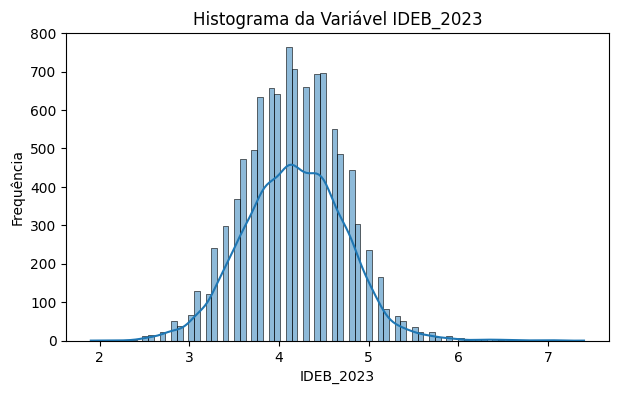

In [9]:
# Plota o histograma da variável IDEB_2023
plt.figure(figsize=(7, 4))
sns.histplot(df['IDEB_2023'], kde=True)
plt.title('Histograma da Variável IDEB_2023')
plt.xlabel('IDEB_2023')
plt.ylabel('Frequência')
plt.show()



In [10]:

# Calcular medidas de dispersão para a variável IDEB_2023

# Variância amostral
variance = df['IDEB_2023'].var()

# Desvio padrão amostral
std_dev = df['IDEB_2023'].std()

# Amplitude
amplitude = df['IDEB_2023'].max() - df['IDEB_2023'].min()

# Intervalo interquartílico (IIQ)
q1 = df['IDEB_2023'].quantile(0.25)
q3 = df['IDEB_2023'].quantile(0.75)
iqr = q3 - q1

# Coeficiente de dispersão quartílica
coefficient_quartile_dispersion = iqr / (q1 + q3)

# Coeficiente de variação
coefficient_variation = (std_dev / df['IDEB_2023'].mean()) * 100


print(f"Variância amostral: {variance}")
print(f"Desvio padrão amostral: {std_dev}")
print(f"Amplitude: {amplitude}")
print(f"Intervalo interquartílico (IIQ): {iqr}")
print(f"Coeficiente de dispersão quartílica: {coefficient_quartile_dispersion}")
print(f"Coeficiente de variação: {coefficient_variation}")


Variância amostral: 0.3175981110609499
Desvio padrão amostral: 0.5635584362432612
Amplitude: 5.5
Intervalo interquartílico (IIQ): 0.7000000000000002
Coeficiente de dispersão quartílica: 0.08433734939759037
Coeficiente de variação: 13.516910170254862


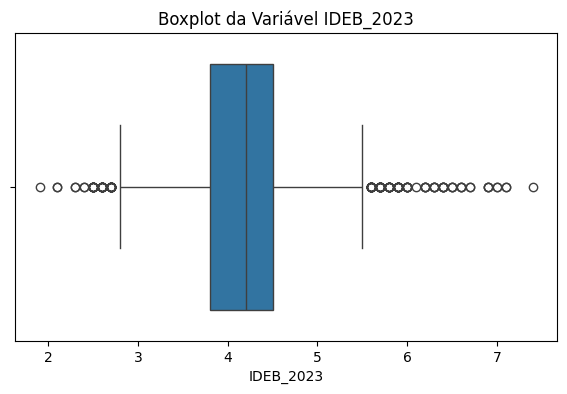

In [11]:
# Boxplot com intervalo interquartil
plt.figure(figsize=(7, 4))
sns.boxplot(x=df['IDEB_2023'])
plt.title('Boxplot da Variável IDEB_2023')
plt.xlabel('IDEB_2023')
plt.show()


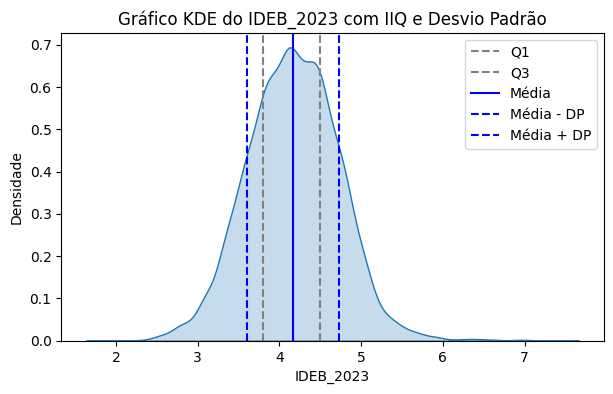

In [12]:

#Plot
#Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Calcula os quartis
q1 = df['IDEB_2023'].quantile(0.25)
q3 = df['IDEB_2023'].quantile(0.75)

# Calcula a média e o desvio padrão
media = df['IDEB_2023'].mean()
desvio_padrao = df['IDEB_2023'].std()

# Cria o gráfico KDE
plt.figure(figsize=(7, 4))
sns.kdeplot(df['IDEB_2023'], fill=True)

# Adiciona linhas verticais para Q1 e Q3 (cinza)
plt.axvline(x=q1, color='gray', linestyle='--', label='Q1')
plt.axvline(x=q3, color='gray', linestyle='--', label='Q3')


# Adiciona linhas verticais para a média e o desvio padrão (azul)
plt.axvline(x=media, color='blue', linestyle='-', label='Média')
plt.axvline(x=media - desvio_padrao, color='blue', linestyle='--', label='Média - DP')
plt.axvline(x=media + desvio_padrao, color='blue', linestyle='--', label='Média + DP')


plt.title('Gráfico KDE do IDEB_2023 com IIQ e Desvio Padrão')
plt.xlabel('IDEB_2023')
plt.ylabel('Densidade')
plt.legend()
plt.show()


In [ ]:
# Calcula a assimetria (skewness)
skewness = df['IDEB_2023'].skew()

# Calcula a curtose (kurtosis)
kurtosis = df['IDEB_2023'].kurt()

print(f"Assimetria (Skewness): {skewness}")
print(f"Curtose (Kurtosis): {kurtosis}")

# Interpretação da assimetria:
# Se skewness > 0: distribuição assimétrica positiva (cauda à direita)
# Se skewness < 0: distribuição assimétrica negativa (cauda à esquerda)
# Se skewness ≈ 0: distribuição simétrica

# Interpretação da curtose:
# Se kurtosis ≈ 3: distribuição mesocúrtica (semelhante à normal)
# Se kurtosis > 3: distribuição leptocúrtica (mais concentrada, caudas pesadas)
# Se kurtosis < 3: distribuição platicúrtica (menos concentrada, caudas leves)


Assimetria (Skewness): 0.17688872794080926
Curtose (Kurtosis): 0.7952611850844771


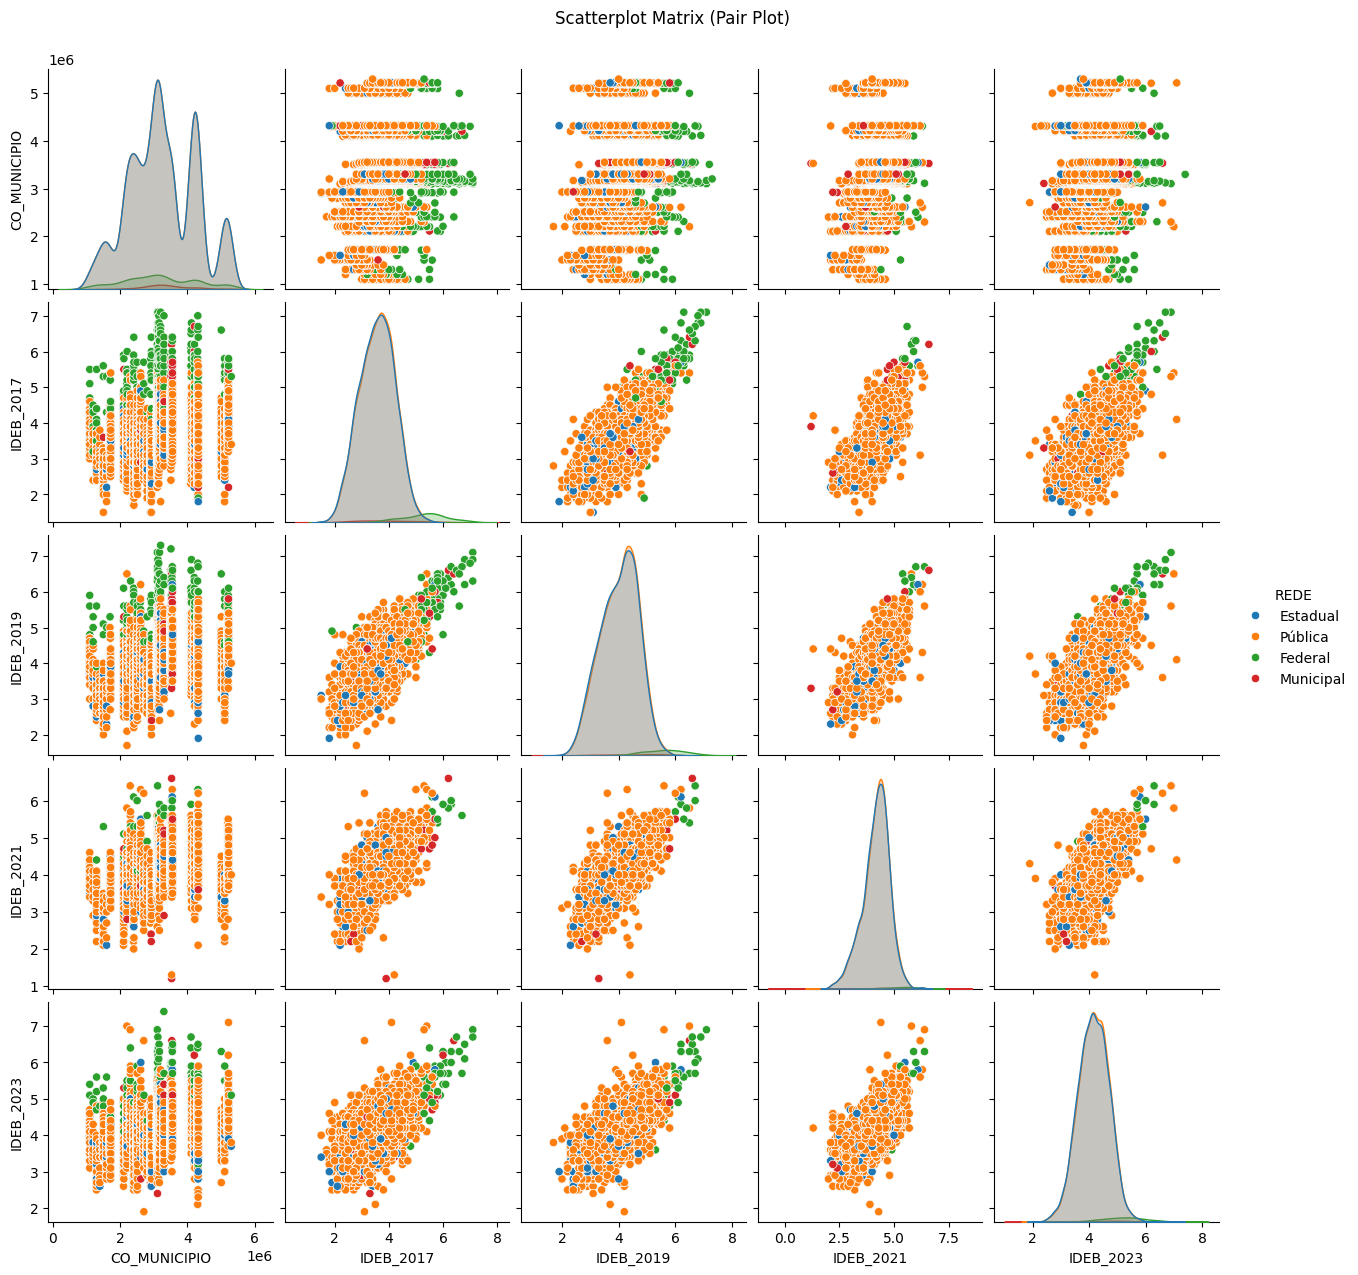

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


# Gera o pair plot, colorindo pelas tipo de REDE
sns.pairplot(df, hue="REDE")
plt.suptitle("Scatterplot Matrix (Pair Plot)", y=1.02)
plt.show()